In [12]:
# We are using MNIST dataset. So, it does not require the data preparation step.

# Step 2: fetching the digital image of data

from sklearn.datasets import load_digits      # Imports digits database
import pylab as pl
digits = load_digits()                          # Loads digits

<Figure size 432x288 with 0 Axes>

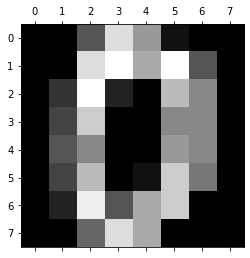

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [13]:
# Working with images isn't much different from working with other data sets. In the case of a gray image, you put a value in every matrix entry that depicts the gray value to be shown.
# Step 4: Using Scikit-learn

pl.gray()                                    # Turns image into gray-scale values
pl.matshow(digits.images[0])                 # Shows first images
pl.show()
digits.images[0]                             # Shows the corresponding matrix

# We'll turn an image into something useable by the Naïve Bayes classifier by getting the grayscale value for its pixels and putting those values in a list.

In [24]:
# Image data classification problem on images of digits

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
import pylab as plt

# Step 1: Select target variable
y = digits.target

# Step2: Prepare data. Reshape adapts the matrix form. This method could, for instance, turn a 10x10 matrix into 100 vectors

n_samples = len(digits.images)
X= digits.images.reshape((n_samples, -1))

print(X)

# Step3: Split into test set and training set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Step4: Select a Naïve Bayes classifier ; use a Guassian distribution to estimate probability
gnb = GaussianNB()

# Step5: Fit data
fit = gnb.fit(X_train, y_train)

# Step6: Predict data for unseen data
predicted = fit.predict(X_test)

# Step7: Create confusion matrix
confusion_matrix(y_test, predicted)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


array([[37,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 39,  0,  0,  0,  0,  0,  0,  4,  0],
       [ 0,  7, 20,  2,  0,  0,  0,  0, 15,  0],
       [ 0,  0,  0, 39,  0,  0,  0,  1,  5,  0],
       [ 0,  1,  0,  0, 31,  0,  0,  6,  0,  0],
       [ 0,  1,  0,  1,  0, 43,  0,  3,  0,  0],
       [ 0,  0,  1,  0,  0,  0, 51,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0, 47,  0,  0],
       [ 0,  6,  0,  1,  0,  1,  0,  2, 38,  0],
       [ 0,  2,  0,  4,  1,  0,  0,  3,  7, 30]])

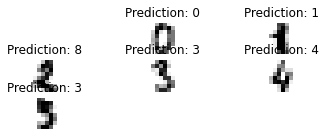

In [25]:
# Let's assume we want to show off our results in a more easily understandable way or we want to inspect several of the images and the predictions our programs has made we can use the following code to display one next to other.
# If we are satisfied with the rsults, the model training ends here and we arrive at step six: presenting the results.


# Stores number image matrix and its prediction(as a number) together in a array.

images_and_predictions = list(zip(digits.images, fit.predict(X)))

# Loops through first 7 images
for index, (image, prediction) in enumerate(images_and_predictions[:6]):
    
    # Adds an extra subplot on a 6X3 plot grid. This code could be simplified as: plt.subplot(3,2,index) but this looks visually more appealing
    plt.subplot(6, 3, index +5)                
    
    # Doesn't show an axis
    plt.axis('off')
    
    # Shows image in grayscale
    plt.imshow(image, cmap= plt.cm.gray_r, interpolation= 'nearest')
    
    # Shows the predicted value as the title to the shown image
    plt.title('Prediction: %i' % prediction)
    
# Shows the full plot that is now populated with 6 subplots
plt.show()
    
    
    
# For each blurry image a number is predicted; only the number 2 is misinterpreted as 8. 
# Then an ambiguous number is predicted to be 3 but it could as well be 5; even to human eyes this isn't clear.